Using cpu
Training dataset size: 60000
Validation dataset size: 10000
torch.Size([1, 28, 28])
Image label: 5


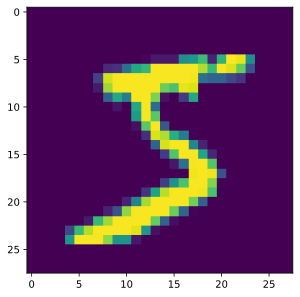

In [49]:
from torchvision import datasets
from torchvision import transforms 
from torch.utils.data import DataLoader 
from torch import nn
import torch.nn.functional as F
import torch
from d2l import torch as d2l
import matplotlib.pyplot as plt

RANDOM_SEED= 123
LEARNING_RATE = 0.1
NUM_EPOCHS = 10
BATCH_SIZE = 64

if torch.cuda.is_available():
    DEVICE = torch.device("cuda")
    torch.cuda.manual_seed(RANDOM_SEED)
else:
    DEVICE = torch.device("cpu")
    torch.manual_seed(RANDOM_SEED)

print('Using',DEVICE)

def one_hot_encode(labels, num_classes):
    return torch.eye(num_classes)[labels]

class MNIST(d2l.DataModule):
    def __init__(self, batch_size=BATCH_SIZE):
        super().__init__()
        self.save_hyperparameters()
        self.batch_size = batch_size
        self.transform = d2l.transforms.Compose([
            d2l.transforms.ToTensor()])
        self.train_set = datasets.MNIST(root='data',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)
        self.val_set = datasets.MNIST(root='data', 
                              train=False,
                              transform=transforms.ToTensor())
        
    def get_dataloader(self, train):
        data = self.train_set if train else self.val_set
        return DataLoader(data, self.batch_size, shuffle=train)
        
data = MNIST()
print(f"Training dataset size: {len(data.train_set)}")
print(f"Validation dataset size: {len(data.val_set)}")
print(data.train_set[0][0].shape)
image_numpy = data.train_set[0][0].permute(1, 2, 0).cpu().numpy()
plt.imshow(image_numpy)
print(f"Image label: {data.train_set[0][1]}")



In [50]:
x, y = next(iter(data.train_dataloader()))
print(x.shape, x.dtype, y.shape, y.dtype)


torch.Size([64, 1, 28, 28]) torch.float32 torch.Size([64]) torch.int64


## 2a) Perceptron com uma camada escondida, função de ativação logística, função custo SSE e otimização por descida de gradiente.

C:\Users\yuria\anaconda3\envs\d2l\lib\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


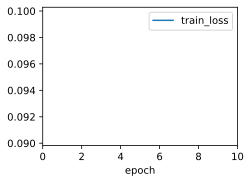

In [ ]:
class MLP2a(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.LazyLinear(num_hiddens),
            nn.Sigmoid(),
            nn.LazyLinear(num_outputs),
            nn.Sigmoid()
        )
        
    def loss(self, y_hat, y):
        y_one_hot = one_hot_encode(y, y_hat.size(-1)).to(y_hat.device)
        fn = nn.MSELoss()
        return fn(y_hat, y_one_hot)
    
    def configure_optimizers(self):
        return torch.optim.SGD(self.parameters(), self.lr)

model = MLP2a(num_outputs=10, num_hiddens=128, lr=LEARNING_RATE)
trainer = d2l.Trainer(max_epochs=NUM_EPOCHS,)
trainer.fit(model, data)


In [ ]:
test_acc = d2l.evaluate_accuracy_gpu(model, data.val_dataloader())
print(f"Test accuracy: {test_acc * 100:.2f}%")

## 2b) Saída do tipo softmax, custo "entropia cruzada"

In [ ]:
class MLP2b(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.LazyLinear(num_hiddens),
            nn.Sigmoid(),
            nn.LazyLinear(num_outputs),
            nn.Softmax()
        )
    
    def configure_optimizers(self):
        return torch.optim.SGD(self.parameters(), self.lr)

model = MLP2b(num_outputs=10, num_hiddens=128, lr=LEARNING_RATE)
trainer = d2l.Trainer(max_epochs=NUM_EPOCHS,)
trainer.fit(model, data)

In [ ]:
test_acc = d2l.evaluate_accuracy_gpu(model, data.val_dataloader())
print(f"Test accuracy: {test_acc * 100:.2f}%")

## 2c) Otimizador Adam

In [ ]:
class MLP2c(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.LazyLinear(num_hiddens),
            nn.Sigmoid(),
            nn.LazyLinear(num_outputs),
            nn.Softmax()
        )
    
    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), self.lr)

model = MLP2c(num_outputs=10, num_hiddens=128, lr=LEARNING_RATE)
trainer = d2l.Trainer(max_epochs=NUM_EPOCHS,)
trainer.fit(model, data)

In [ ]:
test_acc = d2l.evaluate_accuracy_gpu(model, data.val_dataloader())
print(f"Test accuracy: {test_acc * 100:.2f}%")


In [ ]:
LEARNING_RATE = 0.01
model = MLP2c(num_outputs=10, num_hiddens=128, lr=LEARNING_RATE)
trainer = d2l.Trainer(max_epochs=NUM_EPOCHS,)
trainer.fit(model, data)

In [ ]:
test_acc = d2l.evaluate_accuracy_gpu(model, data.val_dataloader())
print(f"Test accuracy: {test_acc * 100:.2f}%")

## 2d) A função Relu

### Uma camada escondida com 256 neurônios

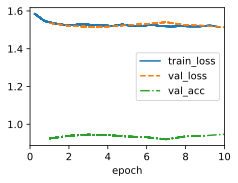

In [14]:
model = MLP2d(num_outputs=10, num_hiddens=256, lr=LEARNING_RATE)
trainer = d2l.Trainer(max_epochs=NUM_EPOCHS,)
trainer.fit(model, data)

In [15]:
test_acc = d2l.evaluate_accuracy_gpu(model, data.val_dataloader())
print(f"Test accuracy: {test_acc * 100:.2f}%")

Test accuracy: 94.71%


### Duas camadas escondidas com 128 neurônios

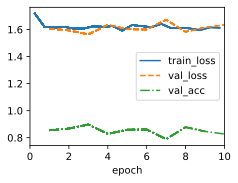

In [16]:
class MLP2e(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.LazyLinear(num_hiddens),
            nn.ReLU(),
            nn.LazyLinear(num_hiddens),
            nn.ReLU(),
            nn.LazyLinear(num_outputs),
            nn.Softmax()
        )
    
    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), self.lr)

model = MLP2e(num_outputs=10, num_hiddens=128, lr=LEARNING_RATE)
trainer = d2l.Trainer(max_epochs=NUM_EPOCHS,)
trainer.fit(model, data)

In [17]:
test_acc = d2l.evaluate_accuracy_gpu(model, data.val_dataloader())
print(f"Test accuracy: {test_acc * 100:.2f}%")

Test accuracy: 82.66%


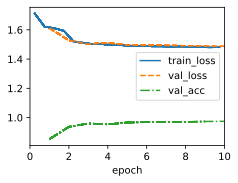

In [30]:
model = MLP2e(num_outputs=10, num_hiddens=128, lr=0.001)
trainer = d2l.Trainer(max_epochs=NUM_EPOCHS,)
trainer.fit(model, data)

In [31]:
test_acc = d2l.evaluate_accuracy_gpu(model, data.val_dataloader())
print(f"Test accuracy: {test_acc * 100:.2f}%")

Test accuracy: 97.43%


## 3. Visualização

In [32]:
def visualize_misclassified(model, data, device, n_examples=5):
    """
    Visualiza exemplos mal-classificados do modelo no conjunto de validação.
    
    Parâmetros:
        model (d2l.Classifier): O modelo treinado.
        data (MNIST): O objeto de dados contendo os conjuntos de treino e validação.
        device (torch.device): Dispositivo CPU ou GPU.
        n_examples (int): Número de exemplos mal-classificados a serem exibidos.
    """
    # Coloca o modelo em modo de avaliação
    model.eval()
    misclassified = []

    # Dataloader do conjunto de validação
    val_loader = data.val_dataloader()

    # Passa por todos os batches do conjunto de validação
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)  # Predições do modelo
            incorrect = (predicted != labels).nonzero(as_tuple=True)[0]

            # Armazena os exemplos mal-classificados
            for idx in incorrect:
                misclassified.append((images[idx].cpu(), labels[idx].item(), predicted[idx].item()))

            # Interrompe quando atingir o número desejado
            if len(misclassified) >= n_examples:
                break

    # Exibe os exemplos mal-classificados
    n_display = min(len(misclassified), n_examples)
    fig, axes = plt.subplots(1, n_display, figsize=(10, 5))
    fig.suptitle("Exemplos mal-classificados", fontsize=16)

    for i, (img, true_label, pred_label) in enumerate(misclassified[:n_display]):
        # Transforma a imagem para exibição
        img = img.numpy().squeeze()
        axes[i].imshow(img, cmap="gray")
        axes[i].axis("off")
        axes[i].set_title(f"Esperado: {true_label}\nObtido: {pred_label}")

    plt.show()

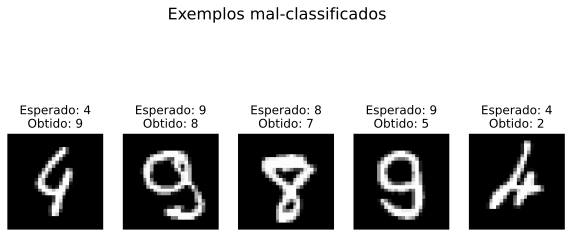

In [33]:
# Visualiza exemplos mal-classificados
visualize_misclassified(model, data, DEVICE, n_examples=5)

### Pode-se observar que a maioria dos erros cometidos poderia também ser cometido por pessoas.

## 4. Matriz de confusão

#### Aqui serão necessárias as bibliotecas sklearn e seaborn. 

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

def plot_confusion_matrix(model, data, device):
    """
    Calcula e exibe a matriz de confusão para o conjunto de validação.

    Parâmetros:
        model (d2l.Classifier): O modelo treinado.
        data (MNIST): O objeto contendo os conjuntos de dados.
        device (torch.device): O dispositivo (CPU ou GPU).
    """
    # Coloca o modelo em modo de avaliação
    model.eval()
    
    # Listas para armazenar os rótulos verdadeiros e as predições
    all_labels = []
    all_preds = []

    # DataLoader do conjunto de validação
    val_loader = data.val_dataloader()

    # Itera sobre os batches do conjunto de validação
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            
            # Armazena os rótulos verdadeiros e as predições
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    # Calcula a matriz de confusão
    conf_matrix = confusion_matrix(all_labels, all_preds, labels=np.arange(10))

    # Exibe a matriz de confusão usando Seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
    plt.title("Matriz de Confusão")
    plt.xlabel("Predição")
    plt.ylabel("Rótulo Verdadeiro")
    plt.show()

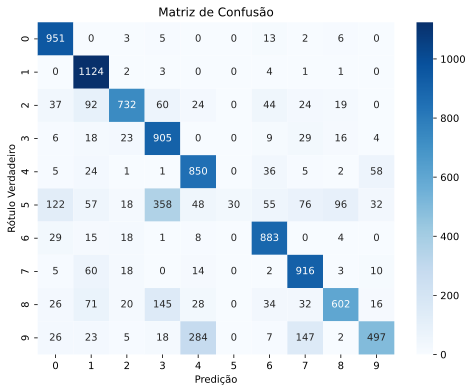

In [48]:
# Exibe a matriz de confusão do modelo treinado
plot_confusion_matrix(model, data, DEVICE)

#### Os erros mais comuns são:
#### 0 e 6; 1 e 6;             2 e 1;         3 e 7;      4 e 9     
#### 5 e 3;       6 e 0;       7 e 1;       8 e 3;        9 e 4         

#### As confusões mais comuns são aquelas entre números similares como se pode esperar.